In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

La función np.linspace es una función de la biblioteca NumPy en Python, utilizada para generar secuencias de números uniformemente espaciados. En la línea de código que mencionaste:

Inicio (0.01): Este es el valor inicial de la secuencia. En este caso, la secuencia comienza en 0.01.

Fin (0.1): Este es el valor final de la secuencia. La secuencia generada incluirá números hasta el valor 0.1.

num_points: Este parámetro define el número total de puntos o valores en la secuencia. Si num_points es, por ejemplo, 100, la función np.linspace generará 100 valores uniformemente espaciados entre 0.01 y 0.1.

El resultado es un array de NumPy que contiene valores que van desde 0.01 hasta 0.1, distribuidos de manera uniforme. Por ejemplo, si num_points es 10, los valores podrían ser [0.01, 0.02, 0.03, ..., 0.1].

In [35]:
# Parámetros del modelo
points = 100
b_values = [50, 200, 500]  # Diferentes niveles de deuda para análisis
R_values = np.linspace(0.05, 0.3, points)  # Rango de tasas de interés
income_mean = 2000  # Media del ingreso del gobierno
income_sd = 500  # Desviación estándar del ingreso

R_libre = 0.1
income_default = 1000

# Creación de la distribución normal para el ingreso
income_distribution = norm(income_mean, income_sd)

Función para calcular la probabilidad de default, como la probabilidad de que la distribución del ingreso sea mayor que el Threshold igual al servicio de la deuda

In [11]:
def default_probability(debt, interest_rate, income_distribution):
    debt_service = debt * interest_rate
    threshold = income_default + debt_service
    return income_distribution.cdf(threshold)

Función para calcular ingresos esperados

El ingreso esperado se calcula como la probabilidad de no hacer default por el ingreso medio menos el servicio de la deuda más la probabilidad de hacer default por el ingreso de default

In [12]:
def expected_income(debt, interest_rate, income_distribution):
    prob_default = default_probability(debt, interest_rate, income_distribution)
    
    return (1 - prob_default) * (income_distribution.mean() - debt * interest_rate) + prob_default * income_default

Para cada nivel de deuda, generamos los valores esperados para cada nivel de tasas de interés

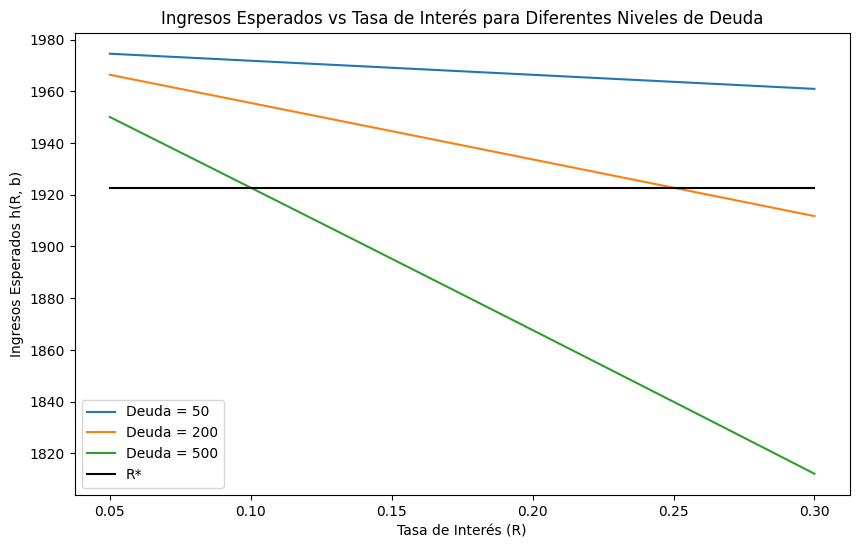

In [36]:
# Cálculos y gráficas
plt.figure(figsize=(10, 6))
for b in b_values:
    h_R = [expected_income(b, R, income_distribution) for R in R_values]
    plt.plot(R_values, h_R, label=f'Deuda = {b}')

h_Rl = [expected_income(b, R_libre, income_distribution)]

plt.plot(R_values, np.full(100, h_Rl), label='R*', color='Black')

plt.xlabel('Tasa de Interés (R)')
plt.ylabel('Ingresos Esperados h(R, b)')
plt.title('Ingresos Esperados vs Tasa de Interés para Diferentes Niveles de Deuda')
plt.legend()
plt.show()